# Network Analysis with NetworkX
One key progression when working with network data is to shift your understanding beyond simply thinking of them as visualisations that we can qualitatively interpret, but also as models for structuring data in a relational way that allows us to ask different kinds of questions.

Furthermore, network analysis can be in and of itself a method of analysis, but it can also form a part of a larger analysis. For example by using network analysis to identify community partitions you can create a categorical variable to then subdivide your data during exploratory analysis.

Rather than turn to Gephi, we can use NetworkX for this relational modelling and analysis.

#### [NetworkX](https://networkx.org) is a Python library for creating, analysing, and visualising networks
* written in pure Python
* flexible and easy to install
* relatively scalable

In [1]:
! conda install -c conda-forge networkx pandas scipy seaborn --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /Users/james/miniconda3/envs/teaching

  added / updated specs:
    - networkx
    - pandas
    - scipy
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.4.4           |  py310hd23d0e8_0          62 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          62 KB

The following NEW packages will be INSTALLED:

  brotli             conda-forge/osx-arm64::brotli-1.0.9-h1c322ee_7
  brotli-bin         conda-forge/osx-arm64::brotli-bin-1.0.9-h1c322ee_7
  certifi            conda-forge/osx-arm64::certifi-2022.6.15-py310hbe9552e_0
  cycler            

In [3]:
# Import networkx and other packages we will use

import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

### Create a network
We'll create a small toy network directly using NetworkX. This will...

- Show us how we can directly construct a network model using python.
- Give us a small human readable network that we can then test different metrics on.

In [56]:
# Create an empty network
G = nx.Graph()
# G = nx.DiGraph() # Creates a directed network

# Add nodes
G.add_node(1)

# Or add a set of nodes from a list
G.add_nodes_from([2, 3, 4, 5, 6])
G.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [57]:
# Add edges
G.add_edge(1, 2)
G.add_edge(2, 4)

# Or add a set of edges from a list

node_list = [(1, 4), (3, 4), (1, 5), (2, 6), (5,6)]

G.add_edges_from(node_list)

In [58]:
# Check the created edges
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (2, 4), (2, 6), (3, 4), (5, 6)])

In [59]:
# Check basic properties of the graph

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')

Number of nodes: 6
Number of edges: 7


NetworkX has some visualisation features, based on Matplotlib. Note that it will struggle to provide coherent visuals of very large networks, such as Twitter networks (more on this later).

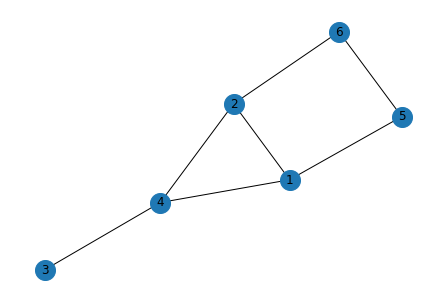

In [60]:

# Draw a network

nx.draw(G, with_labels=True,node_size=400)

# Note that without a provided layout, the network visual will change each run.

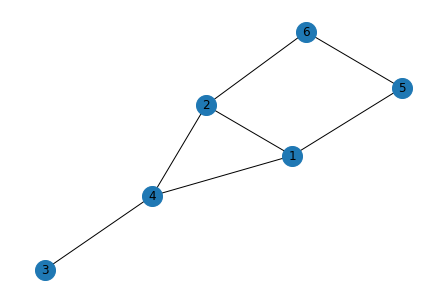

In [65]:
layout = nx.fruchterman_reingold_layout(G, seed=1) # seed ensures we all get the same graph rather than it being random.

nx.draw(G, pos=layout, with_labels=True,node_size=400)


In [136]:
# Basic network properties

pd.DataFrame(G.degree, columns=['id','degree'])

,id,degree
0,1,3
1,2,3
2,3,1
3,4,3
4,5,2
5,6,2


In [144]:
G.degree

DegreeView({1: 3, 2: 3, 3: 1, 4: 3, 5: 2, 6: 2})

In [142]:
# These are easily transferable to a Dataframe if we want to leverage our Pandas skills

between = pd.DataFrame(nx.betweenness_centrality(G))
between

ValueError: If using all scalar values, you must pass an index

### Add node attributes

In [97]:
# Add attributes to existing nodes

G.nodes[1]['team'] = "A"
G.nodes[2]['team'] = "A"
G.nodes[3]['team'] = "B"
G.nodes[4]['team'] = "B"
G.nodes[5]['team'] = "A"
G.nodes[6]['team'] = "A"

In [98]:
# Assign different colour to nodes with different attributes
node_color = ['#a5b41f' if G.nodes[v]["team"] == "A"
    else '#1fb4a5' for v in G]

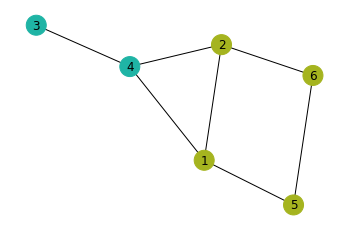

In [116]:
# Plot the network with node colours representing team categories

nx.draw_networkx(G, with_labels=True, node_color=node_color,node_size=400)

plt.axis('off')
plt.show()

### Directed network

In [100]:
# Create an empty directed network
DG = nx.DiGraph()

# Add nodes
DG.add_nodes_from([1, 2, 3, 4, 5, 6])

# Add edges
DG.add_edges_from([(1, 2),(2, 4),(1, 4), (3, 4), (1, 5), (2, 6), (5,6)])

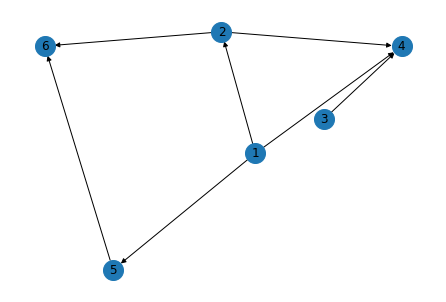

In [104]:
# Draw the directed network

nx.draw(DG, with_labels=True,node_size=400)

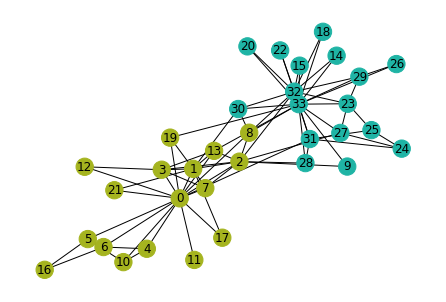

In [132]:
karate = nx.karate_club_graph()
node_color = ['#a5b41f' if karate.nodes[v]["club"] == "Mr. Hi"
              else '#1fb4a5' for v in karate]
nx.draw(karate, with_labels=True, node_color=node_color)

# Exercise 1
Below we will load in a new example graph called the Karate club graph. Can you answer the following questions?
1. How many nodes and edges in the graph?
2.

In [ ]:
# Below we wil

In [ ]:
nx.draw(G)

## An Example Network — Star Wars Episode IV: A New Hope

In this section we use a [small weighted network reconstructed from the movie Star Wars Episode IV: A New Hope](http://evelinag.com/blog/2015/12-15-star-wars-social-network/). [See also this network analysis' tutorial in R](https://cdn.rawgit.com/pablobarbera/data-science-workshop/master/sna/01_networks_intro.html). Each node represents a character and each edge represents the number of times a pair of characters appeared together in a scene of the movie. Edges are undirected and weighted.

In [19]:
# A quick view of the network

!head /Users/valentindanchev/Documents/star-wars-network.csv 

source,target,weight
C-3PO,R2-D2,17
LUKE,R2-D2,13
OBI-WAN,R2-D2,6
LEIA,R2-D2,5
HAN,R2-D2,5
CHEWBACCA,R2-D2,3
DODONNA,R2-D2,1
CHEWBACCA,OBI-WAN,7
C-3PO,CHEWBACCA,5


In [20]:
# Read a weighted edge list via csv

import csv
weighted_edges = []
with open('/Users/valentindanchev/Documents/star-wars-network.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            weighted_edges.append(row)

In [21]:
# Check the result

weighted_edges

[['C-3PO', 'R2-D2', '17'],
 ['LUKE', 'R2-D2', '13'],
 ['OBI-WAN', 'R2-D2', '6'],
 ['LEIA', 'R2-D2', '5'],
 ['HAN', 'R2-D2', '5'],
 ['CHEWBACCA', 'R2-D2', '3'],
 ['DODONNA', 'R2-D2', '1'],
 ['CHEWBACCA', 'OBI-WAN', '7'],
 ['C-3PO', 'CHEWBACCA', '5'],
 ['CHEWBACCA', 'LUKE', '16'],
 ['CHEWBACCA', 'HAN', '19'],
 ['CHEWBACCA', 'LEIA', '11'],
 ['CHEWBACCA', 'DARTH VADER', '1'],
 ['CHEWBACCA', 'DODONNA', '1'],
 ['CAMIE', 'LUKE', '2'],
 ['BIGGS', 'CAMIE', '2'],
 ['BIGGS', 'LUKE', '4'],
 ['DARTH VADER', 'LEIA', '1'],
 ['BERU', 'LUKE', '3'],
 ['BERU', 'OWEN', '3'],
 ['BERU', 'C-3PO', '2'],
 ['LUKE', 'OWEN', '3'],
 ['C-3PO', 'LUKE', '18'],
 ['C-3PO', 'OWEN', '2'],
 ['C-3PO', 'LEIA', '6'],
 ['LEIA', 'LUKE', '17'],
 ['BERU', 'LEIA', '1'],
 ['LUKE', 'OBI-WAN', '19'],
 ['C-3PO', 'OBI-WAN', '6'],
 ['LEIA', 'OBI-WAN', '1'],
 ['MOTTI', 'TARKIN', '2'],
 ['DARTH VADER', 'MOTTI', '1'],
 ['DARTH VADER', 'TARKIN', '7'],
 ['HAN', 'OBI-WAN', '9'],
 ['HAN', 'LUKE', '26'],
 ['GREEDO', 'HAN', '1'],
 ['HAN', 'JABB

In [22]:
# Read the edge list .csv file via pandas

sw_df = pd.read_csv('~/Documents/star-wars-network.csv')
sw_df.head()

,source,target,weight
0,C-3PO,R2-D2,17
1,LUKE,R2-D2,13
2,OBI-WAN,R2-D2,6
3,LEIA,R2-D2,5
4,HAN,R2-D2,5


In [23]:
# Create a graph object using the from_pandas_edgelist function

gsw = nx.from_pandas_edgelist(sw_df, source="source", target="target",edge_attr=True)

In [24]:
print(nx.info(gsw))

Name: 
Type: Graph
Number of nodes: 21
Number of edges: 60
Average degree:   5.7143


In [25]:
# Returns the number of edges in a network
gsw.size()

60

In [26]:
# Returns total weight sum
gsw.size(weight="weight")

295.0

In [27]:
# Check the weight of the edge between a pair of nodes
gsw['C-3PO']['R2-D2']["weight"]

17

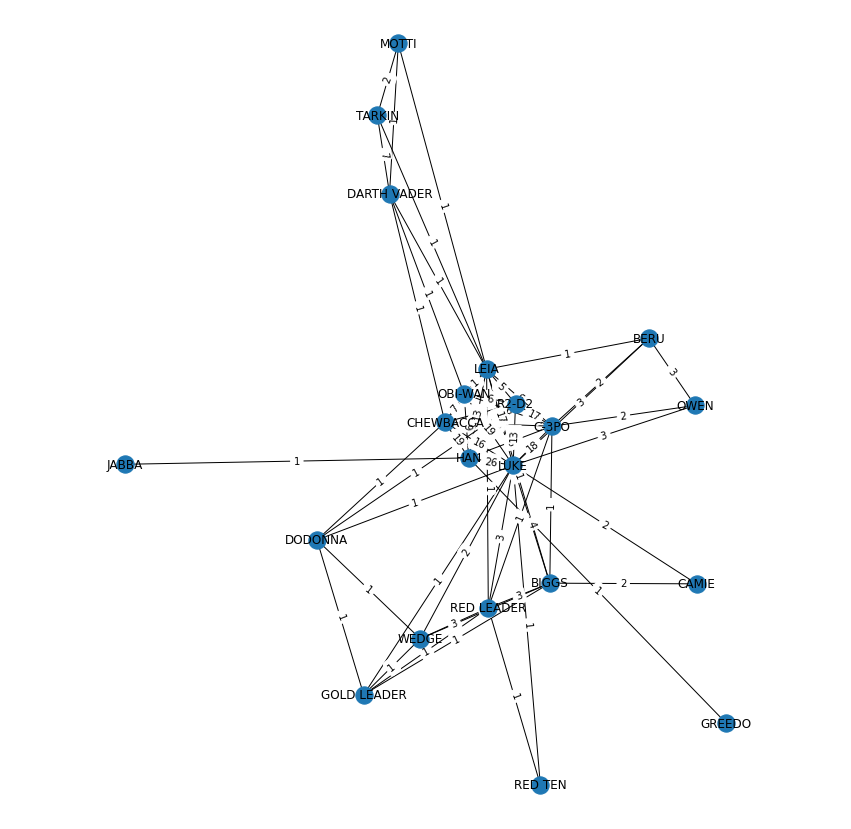

In [28]:
# Specify figure size
plt.figure(figsize=(15,15))
plt.axis('equal')

# Draw the Star Wars Episode IV network 
node_pos = nx.spring_layout(gsw)
nx.draw(gsw,node_pos,with_labels=True)

# Draw edge weights
labels = nx.get_edge_attributes(gsw,'weight')
nx.draw_networkx_edge_labels(gsw,node_pos,edge_labels=labels)
plt.axis('off')
plt.show()

### [netwulf: simple and interactive network visualization in Python](https://netwulf.readthedocs.io/en/latest/index.html)
Visualising networks using NetworkX can get complicated. But you can always pass a networkx Graph-objects to other tools to easily create beautifully looking network visualizations. Netwulf is such an interactive visualization tool for networkx Graph-objects.

<img src='https://raw.githubusercontent.com/benmaier/netwulf/master/img/logo_small.png' width="400" height="200">

In [29]:
# Install and import netwulf
! pip install netwulf
from netwulf import visualize

In [30]:
# You can now do interactive styling of your network visualization in the browser

visualize(gsw)

In [31]:
# Write the network into a Gephi gexf file

nx.write_gexf(gsw, 'gsw_Gephi.gexf')

# Local node-level network diagnostics

In [32]:
# Node degree - number of edges adjacent to that node

gsw_degrees = gsw.degree
sorted(gsw_degrees, key=lambda x: x[1], reverse=True)

[('LUKE', 15),
 ('LEIA', 12),
 ('C-3PO', 10),
 ('HAN', 8),
 ('CHEWBACCA', 8),
 ('R2-D2', 7),
 ('OBI-WAN', 7),
 ('BIGGS', 7),
 ('RED LEADER', 7),
 ('DODONNA', 5),
 ('DARTH VADER', 5),
 ('GOLD LEADER', 5),
 ('WEDGE', 5),
 ('BERU', 4),
 ('OWEN', 3),
 ('MOTTI', 3),
 ('TARKIN', 3),
 ('CAMIE', 2),
 ('RED TEN', 2),
 ('GREEDO', 1),
 ('JABBA', 1)]

Text(0.5, 1.0, 'Star Wars Episode IV network')

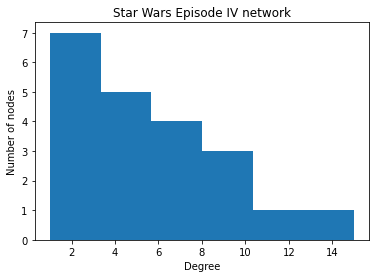

In [33]:
# Plot a histogram for node degrees
degree_values = [v for k, v in gsw_degrees]
plt.hist(degree_values,6)

plt.xlabel('Degree')
plt.ylabel('Number of nodes') 
plt.title('Star Wars Episode IV network')

In [34]:
# Node strenght - sum of the edge weights adjacent to the node

gsw_weights=gsw.degree(weight='weight')
sorted(gsw_weights, key=lambda x: x[1], reverse=True)

[('LUKE', 129),
 ('HAN', 80),
 ('C-3PO', 64),
 ('CHEWBACCA', 63),
 ('LEIA', 59),
 ('R2-D2', 50),
 ('OBI-WAN', 49),
 ('BIGGS', 14),
 ('RED LEADER', 13),
 ('DARTH VADER', 11),
 ('TARKIN', 10),
 ('BERU', 9),
 ('WEDGE', 9),
 ('OWEN', 8),
 ('DODONNA', 5),
 ('GOLD LEADER', 5),
 ('CAMIE', 4),
 ('MOTTI', 4),
 ('RED TEN', 2),
 ('GREEDO', 1),
 ('JABBA', 1)]

Text(0.5, 1.0, 'Star Wars Episode IV network')

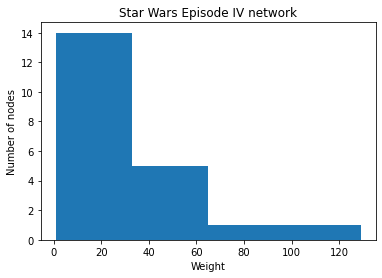

In [35]:
# Plot a histogram for node degrees

weights_values = [v for k, v in gsw_weights]
plt.hist(weights_values,4)

plt.xlabel('Weight')
plt.ylabel('Number of nodes') 
plt.title('Star Wars Episode IV network')

Text(0.5, 1.0, 'Star Wars Episode IV network')

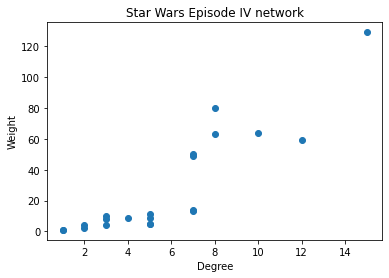

In [36]:
# Plot node degree versus weights
import numpy as np
np.cov(degree_values,weights_values)
plt.scatter(degree_values,weights_values)
plt.xlabel('Degree')
plt.ylabel('Weight')
plt.title('Star Wars Episode IV network')

In [37]:
# Correlation between node degree and strenght
from scipy.stats.stats import pearsonr

# Print the pearson correlation coefficient and the associated p-value
print(pearsonr(degree_values,weights_values))

(0.8851273622332305, 9.819373909550064e-08)


In [38]:
# Compute betweenness centrality — unweighted

betweenness = nx.betweenness_centrality(gsw, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('LUKE', 62.428571428571416),
 ('LEIA', 45.59523809523809),
 ('HAN', 37.0),
 ('C-3PO', 12.095238095238093),
 ('CHEWBACCA', 7.452380952380952),
 ('BIGGS', 6.749999999999999),
 ('RED LEADER', 6.749999999999999),
 ('OBI-WAN', 3.119047619047619),
 ('R2-D2', 2.5),
 ('DARTH VADER', 2.5)]

In [39]:
# Compute betweenness centrality — weighted

betweenness = nx.betweenness_centrality(gsw, weight='weight', normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('LEIA', 59.95000000000001),
 ('DODONNA', 47.53333333333333),
 ('HAN', 37.0),
 ('C-3PO', 32.78333333333333),
 ('BIGGS', 31.91666666666667),
 ('RED LEADER', 31.416666666666668),
 ('GOLD LEADER', 23.799999999999997),
 ('R2-D2', 22.75),
 ('LUKE', 18.333333333333332),
 ('CHEWBACCA', 15.916666666666664)]

In [40]:
# Compute eigenvector centrality

eigenvector = nx.eigenvector_centrality(gsw)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('LUKE', 0.4173849989544929),
 ('LEIA', 0.3621476171212341),
 ('C-3PO', 0.34237759659841116),
 ('CHEWBACCA', 0.29309285556955944),
 ('R2-D2', 0.2768558557532187),
 ('OBI-WAN', 0.27354238616778775),
 ('HAN', 0.2652851070021197),
 ('RED LEADER', 0.22769355656700285),
 ('BIGGS', 0.22769355656700282),
 ('DODONNA', 0.16949029608351718)]

In [41]:
# Compute closeness centrality

closeness = nx.closeness_centrality(gsw)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('LUKE', 0.8),
 ('LEIA', 0.7142857142857143),
 ('C-3PO', 0.6666666666666666),
 ('HAN', 0.625),
 ('CHEWBACCA', 0.625),
 ('R2-D2', 0.6060606060606061),
 ('OBI-WAN', 0.6060606060606061),
 ('BIGGS', 0.5714285714285714),
 ('RED LEADER', 0.5714285714285714),
 ('BERU', 0.5263157894736842)]

In [42]:
# Compute the number of triangles

triangles = nx.triangles(gsw)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('LUKE', 35),
 ('LEIA', 27),
 ('C-3PO', 24),
 ('CHEWBACCA', 19),
 ('R2-D2', 17),
 ('OBI-WAN', 17),
 ('HAN', 15),
 ('BIGGS', 12),
 ('RED LEADER', 12),
 ('GOLD LEADER', 8)]

In [43]:
# Compute clustering

clustering = nx.clustering(gsw)
sorted(clustering.items(), key=lambda x:x[1], reverse=True)[0:10]

[('CAMIE', 1.0),
 ('OWEN', 1.0),
 ('MOTTI', 1.0),
 ('TARKIN', 1.0),
 ('RED TEN', 1.0),
 ('BERU', 0.8333333333333334),
 ('R2-D2', 0.8095238095238095),
 ('OBI-WAN', 0.8095238095238095),
 ('GOLD LEADER', 0.8),
 ('WEDGE', 0.8)]

In [44]:
# Instead of repeating the sort procedure for each centrality diagnostic we could define a function

def sorted_map(map):
    sm = sorted(map.items(), key=lambda x:x[1], reverse=True)[0:10]
    return sm

sorted_map(clustering)

[('CAMIE', 1.0),
 ('OWEN', 1.0),
 ('MOTTI', 1.0),
 ('TARKIN', 1.0),
 ('RED TEN', 1.0),
 ('BERU', 0.8333333333333334),
 ('R2-D2', 0.8095238095238095),
 ('OBI-WAN', 0.8095238095238095),
 ('GOLD LEADER', 0.8),
 ('WEDGE', 0.8)]

In [45]:
# Compute the average shortest path for the network

nx.average_shortest_path_length(gsw)

1.9095238095238096

In [46]:
# Get the distance from Luke to any other character

nx.shortest_path_length(gsw, 'LUKE')

{'LUKE': 0,
 'OBI-WAN': 1,
 'R2-D2': 1,
 'CAMIE': 1,
 'DODONNA': 1,
 'BERU': 1,
 'C-3PO': 1,
 'OWEN': 1,
 'WEDGE': 1,
 'HAN': 1,
 'RED TEN': 1,
 'LEIA': 1,
 'CHEWBACCA': 1,
 'RED LEADER': 1,
 'GOLD LEADER': 1,
 'BIGGS': 1,
 'GREEDO': 2,
 'DARTH VADER': 2,
 'TARKIN': 2,
 'MOTTI': 2,
 'JABBA': 2}

In [47]:
# Get the shortes path between any two characters
nx.shortest_path(gsw, 'LUKE','DARTH VADER')

['LUKE', 'CHEWBACCA', 'DARTH VADER']

### Acknowledgements
* Notebook adapted from original teaching materials by Dr. Valentin Danchev.
* Menczer, F., Fortunato, S., Davis, C. 2020. A first course in network science. Cambridge University Press.
* Rob Chew’s and Peter Baumgartner’s tutorial “Connected: A Social Network Analysis Tutorial with NetworkX”. PyData 2016. 
* Edward L. Platt. 2020. Network Science with Python and NetworkX Quick Start Guide: Explore and visualize network data effectively. Packt Publishing.